In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('customer_churn.csv') #https://www.kaggle.com/datasets/blastchar/telco-customer-churn
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3463,9576-SYUHJ,Male,0,No,No,37,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.15,3369.25,No
3688,5312-UXESG,Female,0,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.05,3990.6,No
2572,9153-BTBVV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1753,No
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes
5174,0947-IDHRQ,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.30,526.7,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df.iloc[488].TotalCharges


' '

In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df[df.TotalCharges!=' '].shape


(7032, 20)

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\byome\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [16]:
df.shape

(7043, 20)

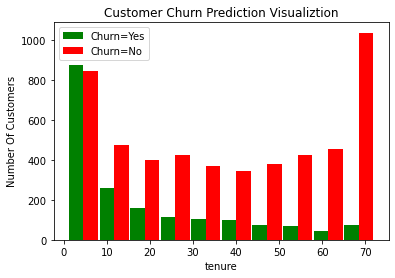

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

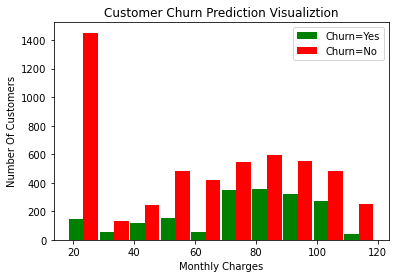

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
tenure_churn_no = df[df.Churn=='No'].MonthlyCharges
tenure_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

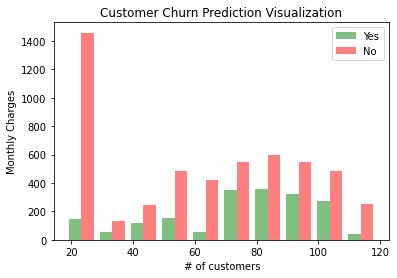

In [20]:
#plt.hist([tenure_churn_yes,tenure_churn_no])
plt.xlabel(' # of customers')
plt.ylabel('Monthly Charges')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],  alpha=0.5,color=['green','red'])
#plt.hist(tenure_churn_no,  alpha=0.5,color='red')
plt.legend(['Yes','No'])
plt.show()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\byome\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\byome\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [28]:
for column in df:
        print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5958,0,0,1,0,11,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2455,1,0,0,0,5,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2268,1,0,0,0,40,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3056,0,0,1,1,50,1,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2400,1,0,0,1,9,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [35]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [44]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
176/176 [==============================] - 0s 888us/step - loss: 0.4742 - accuracy: 0.7691
Epoch 2/100
176/176 [==============================] - 0s 903us/step - loss: 0.4202 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 916us/step - loss: 0.4144 - accuracy: 0.8011
Epoch 4/100
176/176 [==============================] - 0s 889us/step - loss: 0.4127 - accuracy: 0.8075
Epoch 5/100
176/176 [==============================] - 0s 891us/step - loss: 0.4099 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 904us/step - loss: 0.4093 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 898us/step - loss: 0.4068 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 931us/step - loss: 0.4051 - accuracy: 0.8107
Epoch 9/100
176/176 [==============================] - 0s 913us/step - loss: 0.4033 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 892us/step - l

176/176 [==============================] - 0s 799us/step - loss: 0.3582 - accuracy: 0.8320
Epoch 80/100
176/176 [==============================] - 0s 863us/step - loss: 0.3579 - accuracy: 0.8320
Epoch 81/100
176/176 [==============================] - 0s 847us/step - loss: 0.3567 - accuracy: 0.8308
Epoch 82/100
176/176 [==============================] - 0s 846us/step - loss: 0.3567 - accuracy: 0.8345
Epoch 83/100
176/176 [==============================] - 0s 941us/step - loss: 0.3560 - accuracy: 0.8315
Epoch 84/100
176/176 [==============================] - 0s 914us/step - loss: 0.3563 - accuracy: 0.8336
Epoch 85/100
176/176 [==============================] - 0s 788us/step - loss: 0.3568 - accuracy: 0.8338
Epoch 86/100
176/176 [==============================] - 0s 945us/step - loss: 0.3553 - accuracy: 0.8357
Epoch 87/100
176/176 [==============================] - 0s 922us/step - loss: 0.3551 - accuracy: 0.8366
Epoch 88/100
176/176 [==============================] - 0s 781us/step - loss:

44/44 [==============================] - 0s 744us/step - loss: 0.5880 - accuracy: 0.7505


[0.5879703760147095, 0.7505330443382263]

array([[0.39627963],
       [0.5363795 ],
       [0.00481689],
       [0.29738975],
       [0.17843485]], dtype=float32)

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       999
           1       0.58      0.49      0.53       408

    accuracy                           0.75      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.74      0.75      0.74      1407



Text(69.0, 0.5, 'Truth')

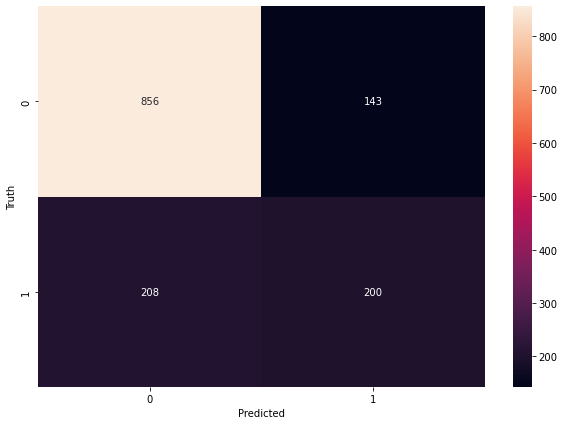

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
total_correct_prediction = (853+222)
total_prediction = (853+146+186+222)
accuracy = round(total_correct_prediction/total_prediction,2)
print((accuracy))

0.76


In [49]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

# Undersampling for imbalanced data.

In [51]:
#class count
count_class_0, count_class_1= df.Churn.value_counts()

#divide by class

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [54]:
count_class_0, count_class_1

(5174, 1869)

In [52]:
df_class_0.shape

(5163, 27)

In [53]:
df_class_1.shape

(1869, 27)

In [67]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [68]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [69]:
X = df_test_under.drop('Churn',axis='columns')
y= df_test_under['Churn']

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=15, stratify=y)

In [74]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [75]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 860us/step - loss: 0.6137 - accuracy: 0.6940
Epoch 2/100
94/94 [==============================] - 0s 892us/step - loss: 0.5081 - accuracy: 0.7649
Epoch 3/100
94/94 [==============================] - 0s 903us/step - loss: 0.4870 - accuracy: 0.7696
Epoch 4/100
94/94 [==============================] - 0s 922us/step - loss: 0.4785 - accuracy: 0.7706
Epoch 5/100
94/94 [==============================] - 0s 916us/step - loss: 0.4737 - accuracy: 0.7729
Epoch 6/100
94/94 [==============================] - 0s 928us/step - loss: 0.4695 - accuracy: 0.7746
Epoch 7/100
94/94 [==============================] - 0s 903us/step - loss: 0.4690 - accuracy: 0.7749
Epoch 8/100
94/94 [==============================] - 0s 916us/step - loss: 0.4657 - accuracy: 0.7776
Epoch 9/100
94/94 [==============================] - 0s 919us/step - loss: 0.4644 - accuracy: 0.7763
Epoch 10/100
94/94 [==============================] - 0s 928us/step - loss: 0.4625 - accura

94/94 [==============================] - 0s 892us/step - loss: 0.3939 - accuracy: 0.8157
Epoch 82/100
94/94 [==============================] - 0s 883us/step - loss: 0.3944 - accuracy: 0.8197
Epoch 83/100
94/94 [==============================] - 0s 940us/step - loss: 0.3929 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 976us/step - loss: 0.3926 - accuracy: 0.8194
Epoch 85/100
94/94 [==============================] - 0s 979us/step - loss: 0.3917 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 0s 920us/step - loss: 0.3914 - accuracy: 0.8201
Epoch 87/100
94/94 [==============================] - 0s 914us/step - loss: 0.3912 - accuracy: 0.8187
Epoch 88/100
94/94 [==============================] - 0s 914us/step - loss: 0.3901 - accuracy: 0.8171
Epoch 89/100
94/94 [==============================] - 0s 914us/step - loss: 0.3893 - accuracy: 0.8184
Epoch 90/100
94/94 [==============================] - 0s 919us/step - loss: 0.3895 - accuracy: 

# Use of Ensemble with undersampling which is supposted to return better result.

In [76]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [77]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=15,stratify=y)

In [80]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [82]:
4130/1495 #with respect to this result, we'd better divide 0's class by 3 to prevent imbalance

2.762541806020067

In [83]:
4130/3 #1376 

1376.6666666666667

In [86]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [91]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [111]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [112]:
def get_train_batch(df_majority,df_minority,start,end):   
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [114]:
X_train,y_train =  get_train_batch(df3_class0,df3_class1,0,1495)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)




#X_train, y_train = get_train_batch(df3_class0,df3_class1,1496,1495*2)

#X_train, y_train = get_train_batch(df3_class0,df3_class1,1495*2,4130-1495*2)


Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7033
Epoch 2/100
94/94 [==============================] - 0s 914us/step - loss: 0.5219 - accuracy: 0.7599
Epoch 3/100
94/94 [==============================] - 0s 899us/step - loss: 0.5039 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 938us/step - loss: 0.4958 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 917us/step - loss: 0.4909 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 937us/step - loss: 0.4886 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 901us/step - loss: 0.4869 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 0s 957us/step - loss: 0.4830 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 930us/step - loss: 0.4802 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 

94/94 [==============================] - 0s 892us/step - loss: 0.4061 - accuracy: 0.8154
Epoch 82/100
94/94 [==============================] - 0s 925us/step - loss: 0.4048 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 919us/step - loss: 0.4085 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 913us/step - loss: 0.4047 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 899us/step - loss: 0.4033 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 908us/step - loss: 0.4040 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 0s 914us/step - loss: 0.4015 - accuracy: 0.8187
Epoch 88/100
94/94 [==============================] - 0s 915us/step - loss: 0.4023 - accuracy: 0.8197
Epoch 89/100
94/94 [==============================] - 0s 919us/step - loss: 0.4012 - accuracy: 0.8167
Epoch 90/100
94/94 [==============================] - 0s 935us/step - loss: 0.4008 - accuracy: 

In [115]:
X_train,y_train =  get_train_batch(df3_class0,df3_class1,1495,2990)
y_preds2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 893us/step - loss: 0.6241 - accuracy: 0.6960
Epoch 2/100
94/94 [==============================] - 0s 914us/step - loss: 0.5229 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 914us/step - loss: 0.5003 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 938us/step - loss: 0.4919 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 895us/step - loss: 0.4889 - accuracy: 0.7592
Epoch 6/100
94/94 [==============================] - 0s 957us/step - loss: 0.4847 - accuracy: 0.7625
Epoch 7/100
94/94 [==============================] - 0s 989us/step - loss: 0.4838 - accuracy: 0.7649
Epoch 8/100
94/94 [==============================] - 0s 939us/step - loss: 0.4820 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 914us/step - loss: 0.4800 - accuracy: 0.7602
Epoch 10/100
94/94 [==============================] - 0s 929us/step - loss: 0.4782 - accura

94/94 [==============================] - 0s 989us/step - loss: 0.4047 - accuracy: 0.8107
Epoch 82/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 957us/step - loss: 0.3996 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 957us/step - loss: 0.4007 - accuracy: 0.8161
Epoch 86/100
94/94 [==============================] - 0s 839us/step - loss: 0.3979 - accuracy: 0.8161
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8134
Epoch 88/100
94/94 [==============================] - 0s 914us/step - loss: 0.3957 - accuracy: 0.8197
Epoch 89/100
94/94 [==============================] - 0s 914us/step - loss: 0.3971 - accuracy: 0.8211
Epoch 90/100
94/94 [==============================] - 0s 925us/step - loss: 0.3949 - accuracy: 0.8201

In [117]:
X_train,y_train =  get_train_batch(df3_class0,df3_class1,2990,4130)
y_preds3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 902us/step - loss: 0.6114 - accuracy: 0.6770
Epoch 2/100
83/83 [==============================] - 0s 902us/step - loss: 0.5227 - accuracy: 0.7545
Epoch 3/100
83/83 [==============================] - 0s 927us/step - loss: 0.4951 - accuracy: 0.7609
Epoch 4/100
83/83 [==============================] - 0s 903us/step - loss: 0.4836 - accuracy: 0.7666
Epoch 5/100
83/83 [==============================] - 0s 909us/step - loss: 0.4761 - accuracy: 0.7742
Epoch 6/100
83/83 [==============================] - 0s 905us/step - loss: 0.4724 - accuracy: 0.7753
Epoch 7/100
83/83 [==============================] - 0s 936us/step - loss: 0.4703 - accuracy: 0.7746
Epoch 8/100
83/83 [==============================] - 0s 943us/step - loss: 0.4664 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 934us/step - loss: 0.4658 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 962us/step - loss: 0.4617 - accura

83/83 [==============================] - 0s 899us/step - loss: 0.3803 - accuracy: 0.8262
Epoch 82/100
83/83 [==============================] - 0s 928us/step - loss: 0.3781 - accuracy: 0.8220
Epoch 83/100
83/83 [==============================] - 0s 911us/step - loss: 0.3781 - accuracy: 0.8258
Epoch 84/100
83/83 [==============================] - 0s 915us/step - loss: 0.3770 - accuracy: 0.8262
Epoch 85/100
83/83 [==============================] - 0s 884us/step - loss: 0.3783 - accuracy: 0.8239
Epoch 86/100
83/83 [==============================] - 0s 903us/step - loss: 0.3761 - accuracy: 0.8239
Epoch 87/100
83/83 [==============================] - 0s 906us/step - loss: 0.3773 - accuracy: 0.8262
Epoch 88/100
83/83 [==============================] - 0s 915us/step - loss: 0.3768 - accuracy: 0.8300
Epoch 89/100
83/83 [==============================] - 0s 937us/step - loss: 0.3744 - accuracy: 0.8300
Epoch 90/100
83/83 [==============================] - 0s 908us/step - loss: 0.3760 - accuracy: 

In [122]:
y_pred_final = y_pred.copy()

for i in range(len(y_pred)):
    n_ones = y_pred[i]+y_preds2[i]+y_preds3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        

In [124]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1033
           1       0.45      0.80      0.57       374

    accuracy                           0.69      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.69      0.70      1407

